# Passwords encryption: The use of Bcrypt

## 1. Introduction

Databases are present in all servers, and them, in web based applications. Major DB have a lot of vulnerabilities, which are inherited to web applications: a simple dump of a user table implies the loss of the authentication system. 

<img src="files/basico01.png" alt="Typical storing of passwords in DB">

### 1.1. Password Encryption

A common approach is to "encrypt passwords". This term is commonly used to a process that instead have to be called "hashing passwords". The idea consists in applying a hash function after users type their passwords and store in DB just the hash of the real password.

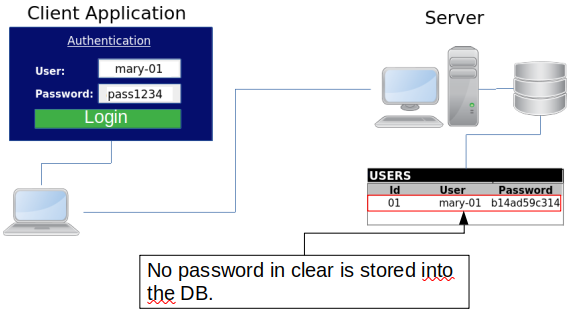

Thus, when user log into the system, he/she type user and password (example: mary-01 and pass1234) and system check for user and the hash of the password. You can see that no real password is stored in the DB becoming a most secure system.

### 1.2. Weaknesses of this approach 

A simple approach to getting the password from its hash is to look up the password on various sites dedicated to cracking hashes.<br>
Using hash, maybe some users that won't make efforts to remember a password may think that a weak (and easy to remember) password like "user1234" can be masked. But that's a mistake: another approach is to implememmt brute-force attacks to commonly used passwords with various hashing algorithms.

### 1.3. Recomendation propposed

In the last years, the OWASP (Open Web Applications Security Project) recommended the use of Bcrypt as the first choice: the use of "salt" and/or "pepper" in the hashes. In last months they put in first place the concept of "work-factor". But in some cases its implemetation is not possible. 
For more info visit the OWASP site: https://cheatsheetseries.owasp.org/cheatsheets/Password_Storage_Cheat_Sheet.html<br>
This notebook explains the use of Bcrypt to hash a password with a salt.

## 2. The use of Bcrypt

Bcrypt combine a hash algorithm plus a salt.

### 2.1. Libraries

These libraries have to be installed in python before lauching this notebook: hashlib and bcrypt. In both cases the installation is easy an direct using "pip" comand.

In [1]:
import bcrypt
import hashlib

### 2.2. Functions

#### User Creation

This function creates the original user: the one that is really stored in the system.

In [2]:
# User Creation
def userCreation():
    user=[]
    # Data input
    print('### User Creation ')
    # user input
    usu=input('Input your user name: ')
    user.append(usu)
    # password input
    password=input('Input your password: ')
    user.append(password)
    salt=bcrypt.gensalt(12)
    hashKey=bcrypt.hashpw(password.encode("utf8"), salt)
    user.append(hashKey)
    user.append(salt)
    print('--- User Created')
    return user

#### New Login

This is the new user that want to be authenticate in the system.

In [3]:
# New Login
def newLogin():
    print('### New User Log ')
    newUser=[]
    # User
    otherUsu=input('Input user name: ')
    newUser.append(otherUsu)
    # Password
    otherKey=input('Input password: ')
    newUser.append(otherKey)
    print('--- Input of New Log Finished')
    return newUser

#### Verification

The info of the new user have to be compared with the info of the user stored.

In [4]:
# Password Verification
#
def loginVerify(user,newUser):
    print('### New User and password Verification ')
    results=[]
    usu=user[0]
    usuPass=user[2]
    newUsu=newUser[0]
    newUsuPass=newUser[1]
    if(usu==newUsu):
        checkUsu=True
    else:
        checkUsu=False
    results.append(checkUsu)
    checkPass=bcrypt.checkpw(newUsuPass.encode("utf8"), usuPass)
    results.append(checkPass)
    print('--- User & Pass Verified')
    return results

### 2.3. Main program

First, user have to be created and stored. Then, data of the new log have to be input. Finally, after the comparisson of both logs, the definition have to be taken: accept or reject the the new log. Information of the result is presented.<br>
In results, it is possible to see in the password: the salt + the hash of password and separatelly the salt.

In [7]:
# Main:
print('### User and password Verification ')
usu=userCreation()
newUsu=newLogin()
verification=loginVerify(usu,newUsu)
usuVerify=verification[0]
passVerify=verification[1]
salt=bcrypt.gensalt(12)
newLogPass=newUsu[1]
newUsu.append(bcrypt.hashpw(newLogPass.encode("utf8"), salt))
if(usuVerify==True):
    print('User verified: '+str(usu[0]))
else:
    print('User NOT verified:')
    print('Stored: '+str(usu[0])+' New Log: '+str(newUsu[0]))
if(passVerify==True):
    print('Password verified:')
    print('Password Stored: '+str(usu[2].decode("utf8")))
    print('Salt Stored: '+str(usu[3].decode("utf8")))
    print('Password Logged: '+str(newUsu[2].decode("utf8")))
    print('New salt: '+str(salt.decode("utf8")))
else:
    print('Password NOT verified:')
    print('Password Stored: '+str(usu[2].decode("utf8")))
    print('Salt Stored: '+str(usu[3].decode("utf8")))
    print('Password Logged: '+str(newUsu[2].decode("utf8")))
    print('New salt: '+str(salt.decode("utf8")))

### User and password Verification 
### User Creation 
Input your user name: jorge
Input your password: pass1234
--- User Created
### New User Log 
Input user name: jorge
Input password: pass1234
--- Input of New Log Finished
### New User and password Verification 
--- User & Pass Verified
User verified: jorge
Password verified:
Password Stored: $2b$12$ZQI0mjkVifNFSERT.rYTN.FBeznpOylulIujSV1TTvxu4kRiwhWE6
Salt Stored: $2b$12$ZQI0mjkVifNFSERT.rYTN.
Password Logged: $2b$12$yC8savlq6E0NLiDHwGIaNOdqZrbO2lf.yA6J2Hg/UgGhRMzFK.qmC
New salt: $2b$12$yC8savlq6E0NLiDHwGIaNO


If password is verified, in the log it is possible to see that with same password, different salt, different hash. Lets take a look what happen whit the same password and forcing the same salt.

In [8]:
print('### User and password Verification WITH SAME SALT')
verification=loginVerify(usu,newUsu)
usuVerify=verification[0]
passVerify=verification[1]
salt=usu[3]
newLogPass=newUsu[1]
newUsu.append(bcrypt.hashpw(newLogPass.encode("utf8"), salt))
if(usuVerify==True):
    print('User verified: '+str(usu[0]))
else:
    print('User NOT verified:')
    print('Stored: '+str(usu[0])+' New Log: '+str(newUsu[0]))
if(passVerify==True):
    print('Password verified:')
    print('Password Stored: '+str(usu[2].decode("utf8")))
    print('Salt Stored: '+str(usu[3].decode("utf8")))
    print('Password Logged: '+str(newUsu[3].decode("utf8")))
    print('New salt: '+str(salt.decode("utf8")))
else:
    print('Password NOT verified:')
    print('Password Stored: '+str(usu[2].decode("utf8")))
    print('Salt Stored: '+str(usu[3].decode("utf8")))
    print('Password Logged: '+str(newUsu[3].decode("utf8")))
    print('New salt: '+str(salt.decode("utf8")))

### User and password Verification WITH SAME SALT
### New User and password Verification 
--- User & Pass Verified
User verified: jorge
Password verified:
Password Stored: $2b$12$ZQI0mjkVifNFSERT.rYTN.FBeznpOylulIujSV1TTvxu4kRiwhWE6
Salt Stored: $2b$12$ZQI0mjkVifNFSERT.rYTN.
Password Logged: $2b$12$ZQI0mjkVifNFSERT.rYTN.FBeznpOylulIujSV1TTvxu4kRiwhWE6
New salt: $2b$12$ZQI0mjkVifNFSERT.rYTN.


## Conclusions

In the last lines we show how to present the same hashed password from the same password (that could be shown as a weakness). But this is very particular case (with didactic intentions) because we forced the use of the same salt, that normally is practically impossible.<br>
We remarc that the mechanism of use of a salt is very effective: same passwords produces different hashes stored in DB. Bcrypt treat very well the use of salt in verification process. <br>
Finally, the process results very fast.
